EDA and Data Analysis

In [38]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
nltk.download(['punkt', 'stopwords', 'wordnet'])

[nltk_data] Downloading package punkt to /Users/asaria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/asaria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/asaria/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
# Read datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Basic dataset information
print("## Dataset Overview")
print("\nTraining Dataset:")
print(f"Shape: {train_df.shape}")
print("\nMissing Values:")
print(train_df.isnull().sum())
print("\nTest Dataset:")
print(f"Shape: {test_df.shape}")
print("\nMissing Values:")
print(test_df.isnull().sum())

# Descriptive statistics for text length
train_df['text_length'] = train_df['crimeaditionalinfo'].str.len()
test_df['text_length'] = test_df['crimeaditionalinfo'].str.len()

print("\n## Text Length Statistics")
print("\nTraining Data:")
print(train_df['text_length'].describe())
print("\nTest Data:")
print(test_df['text_length'].describe())

## Dataset Overview

Training Dataset:
Shape: (93686, 3)

Missing Values:
category                 0
sub_category          6591
crimeaditionalinfo      21
dtype: int64

Test Dataset:
Shape: (31229, 3)

Missing Values:
category                 0
sub_category          2236
crimeaditionalinfo       7
dtype: int64

## Text Length Statistics

Training Data:
count    93665.000000
mean       398.365772
std        329.303728
min          1.000000
25%        199.000000
50%        284.000000
75%        494.000000
max       1517.000000
Name: text_length, dtype: float64

Test Data:
count    31222.000000
mean       399.151848
std        326.924879
min          1.000000
25%        199.000000
50%        288.000000
75%        496.000000
max       1521.000000
Name: text_length, dtype: float64


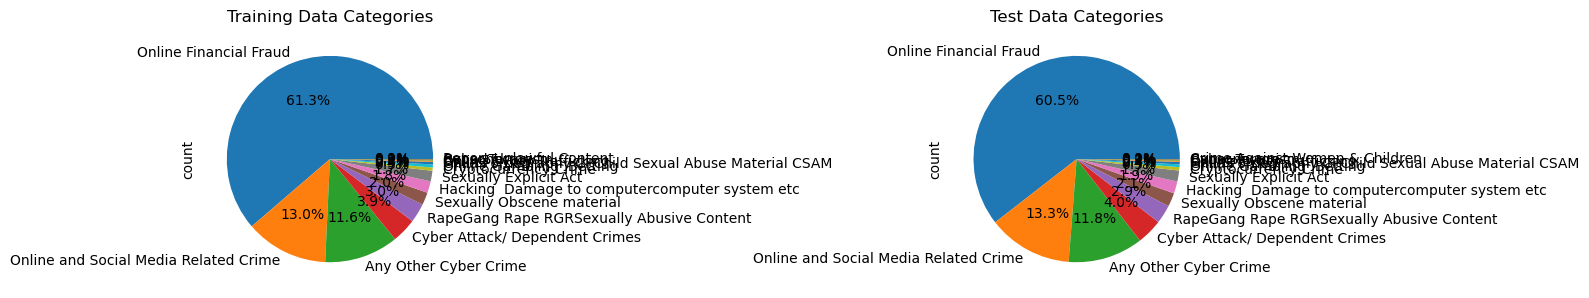

In [40]:


# Compare category distribution between train and test
plt.figure(figsize=(15, 8))
test_categories = test_df['category'].value_counts()
plt.subplot(1, 2, 1)
train_categories.plot(kind='pie', autopct='%1.1f%%', title='Training Data Categories')
plt.subplot(1, 2, 2)
test_categories.plot(kind='pie', autopct='%1.1f%%', title='Test Data Categories')
plt.tight_layout()
plt.show()

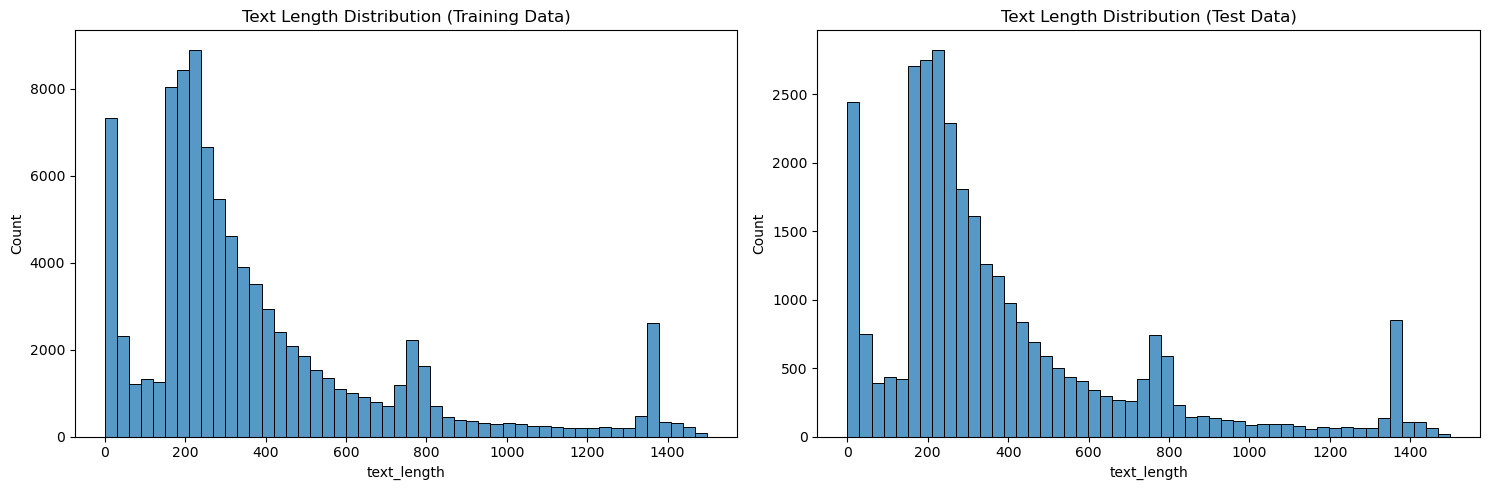

In [41]:
# Text preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Remove extra whitespace
        text = ' '.join(text.split())
        return text
    return ''

# Apply preprocessing to both datasets
train_df['cleaned_text'] = train_df['crimeaditionalinfo'].apply(preprocess_text)
test_df['cleaned_text'] = test_df['crimeaditionalinfo'].apply(preprocess_text)

# Text length analysis
train_df['text_length'] = train_df['cleaned_text'].str.len()
test_df['text_length'] = test_df['cleaned_text'].str.len()

# Plot text length distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='text_length', bins=50)
plt.title('Text Length Distribution (Training Data)')
plt.subplot(1, 2, 2)
sns.histplot(data=test_df, x='text_length', bins=50)
plt.title('Text Length Distribution (Test Data)')
plt.tight_layout()
plt.show()

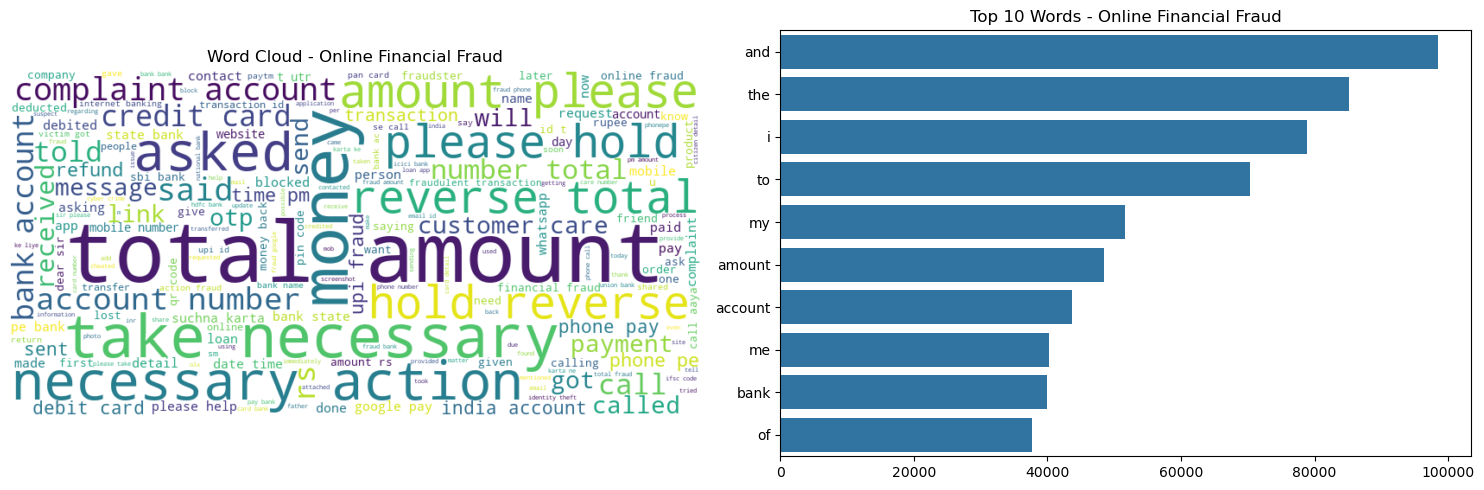

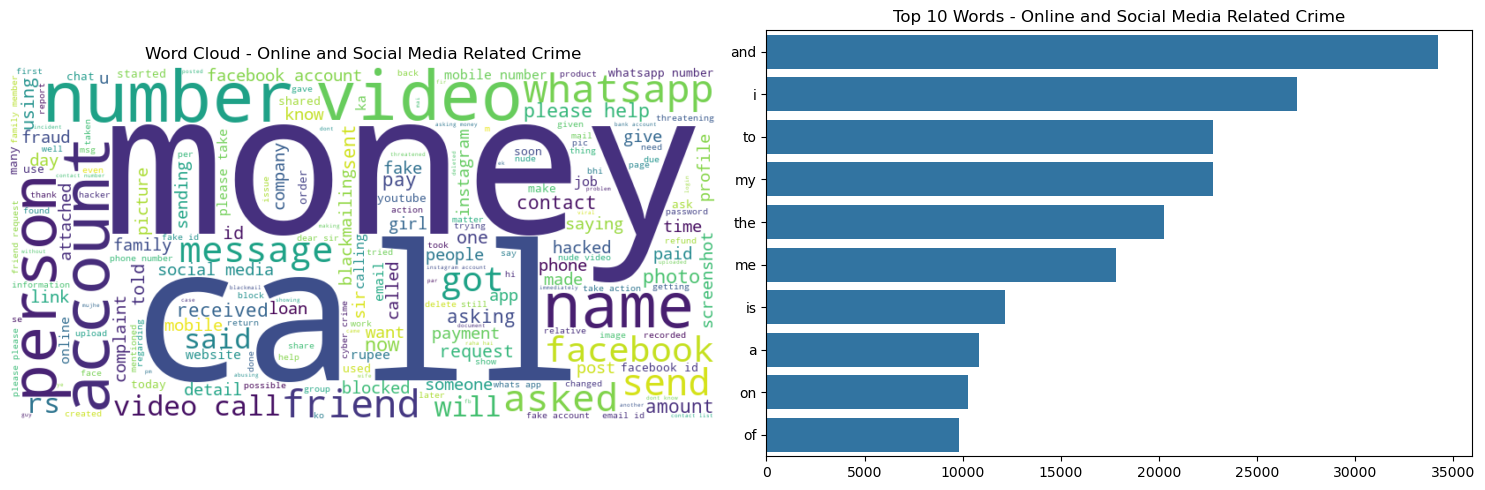

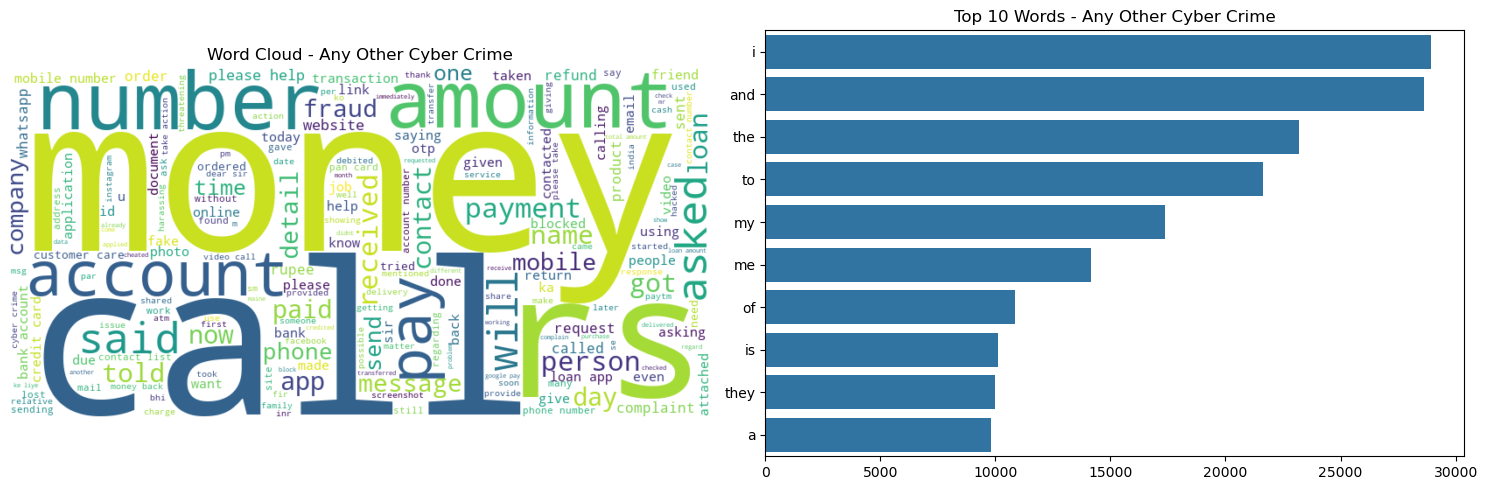

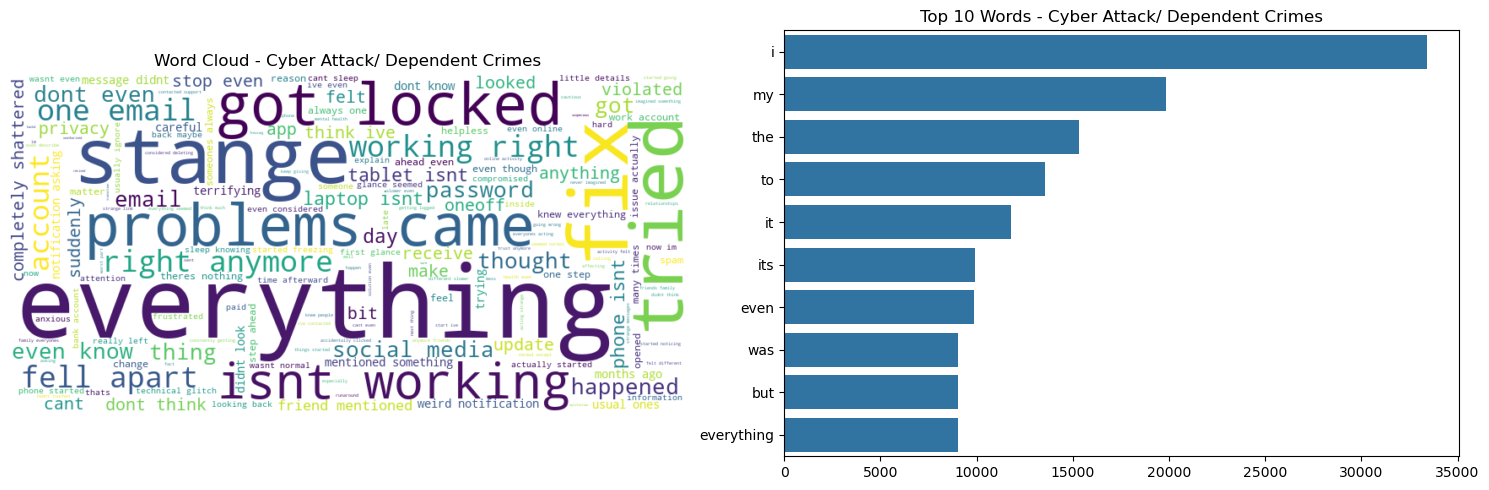

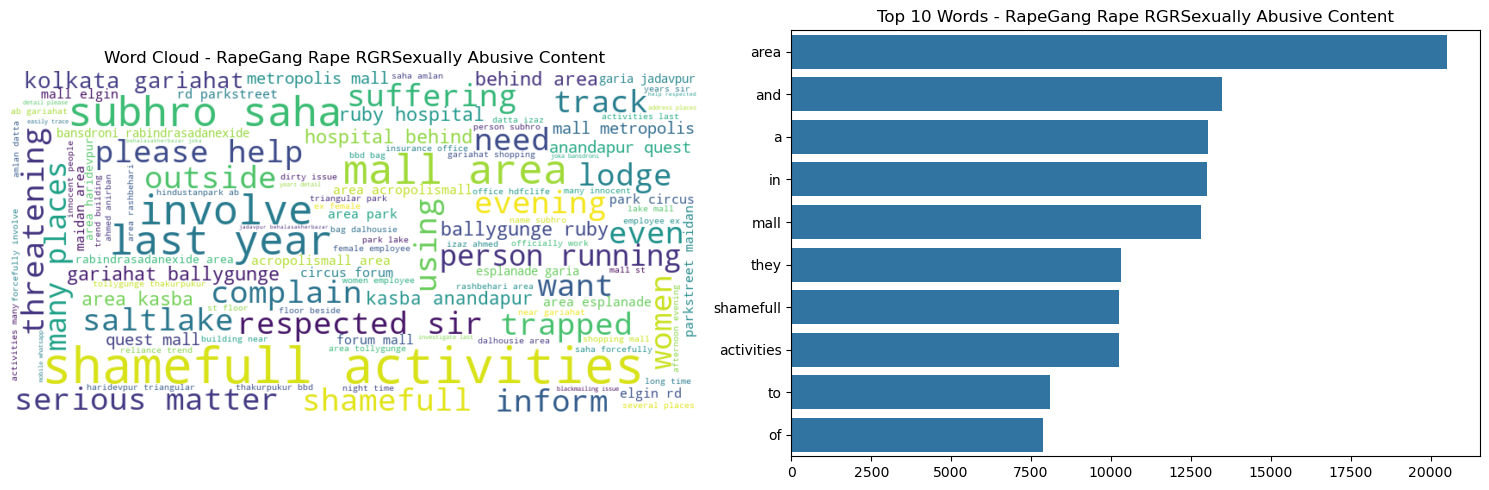

In [42]:
# Word frequency analysis
def get_top_words(texts, n=20):
    words = ' '.join(texts).split()
    return Counter(words).most_common(n)

# Plot top words for each category
def plot_category_wordcloud(df, category):
    texts = df[df['category'] == category]['cleaned_text']
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(texts))
    
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {category}')
    
    # Bar plot of top words
    top_words = get_top_words(texts)
    words, counts = zip(*top_words)
    plt.subplot(1, 2, 2)
    sns.barplot(x=list(counts)[:10], y=list(words)[:10])
    plt.title(f'Top 10 Words - {category}')
    plt.tight_layout()
    plt.show()

# Plot for top 5 categories
for category in train_categories.index[:5]:
    plot_category_wordcloud(train_df, category)

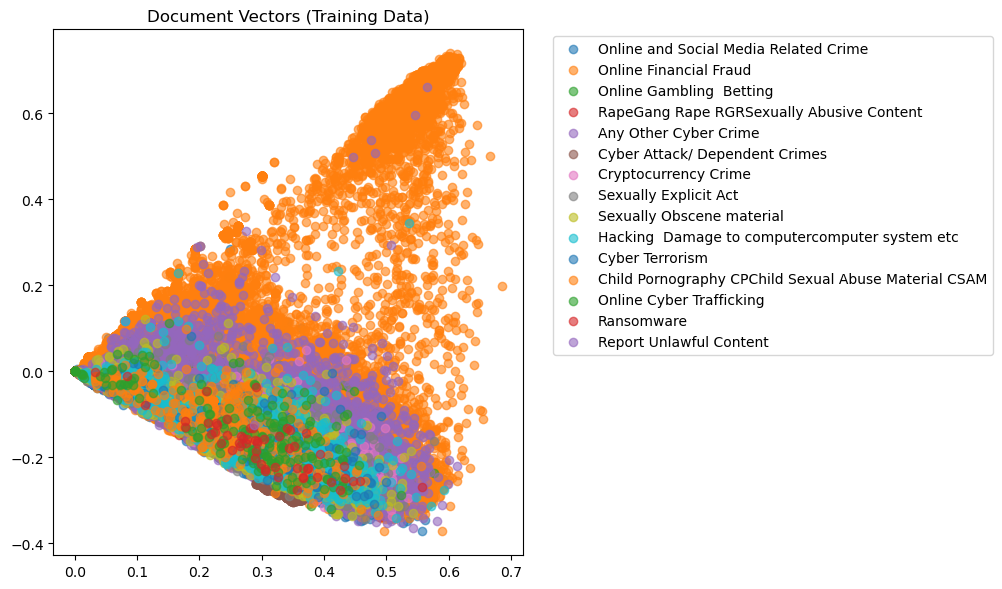

In [43]:
# Advanced text analysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Create TF-IDF vectors
tfidf = TfidfVectorizer(max_features=1000)
train_tfidf = tfidf.fit_transform(train_df['cleaned_text'])
test_tfidf = tfidf.transform(test_df['cleaned_text'])

# Dimensionality reduction for visualization
svd = TruncatedSVD(n_components=2)
train_svd = svd.fit_transform(train_tfidf)
test_svd = svd.transform(test_tfidf)

# Plot document vectors
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
for category in train_df['category'].unique():
    mask = train_df['category'] == category
    plt.scatter(train_svd[mask, 0], train_svd[mask, 1], label=category, alpha=0.6)
plt.title('Document Vectors (Training Data)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

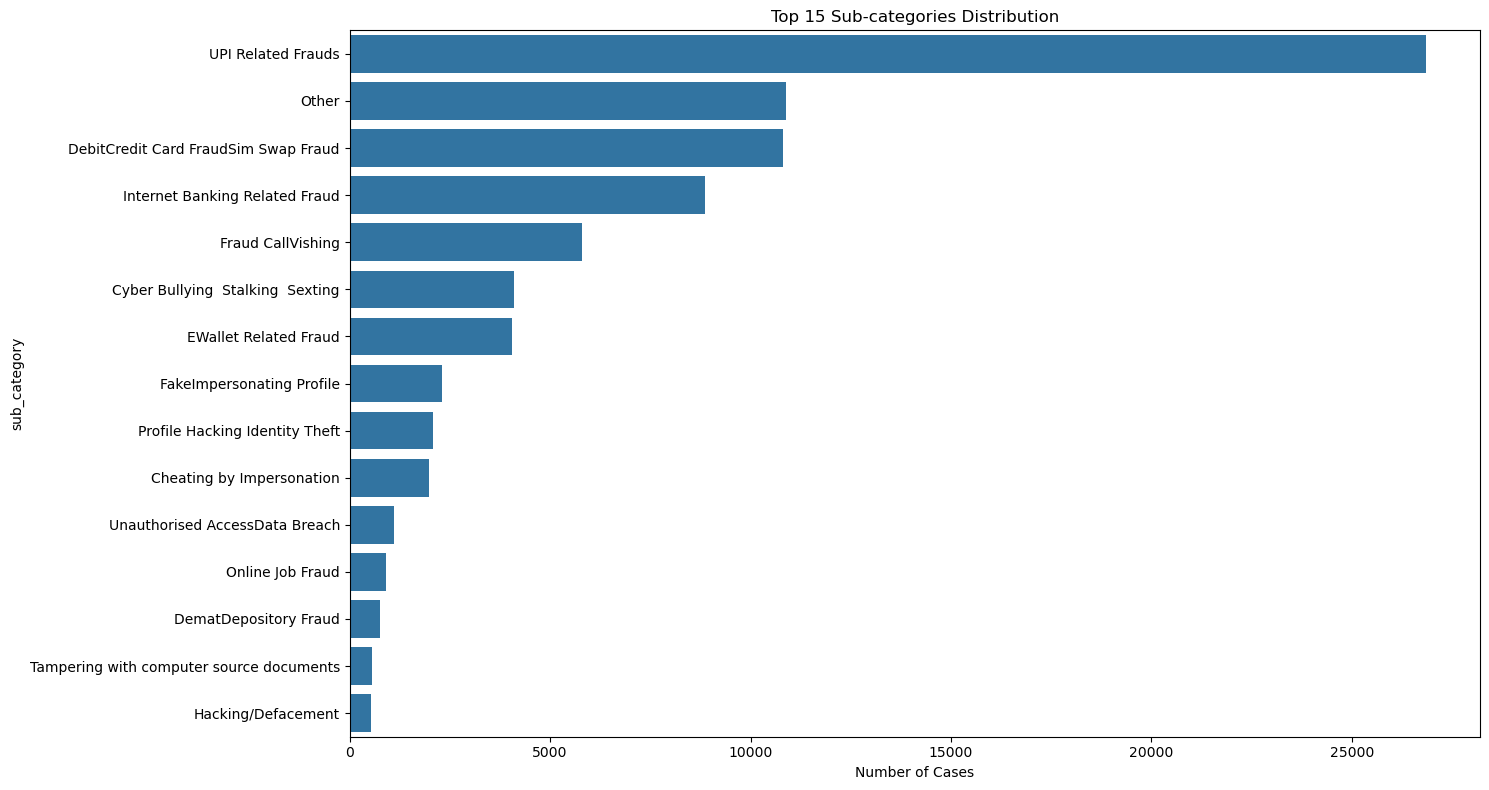

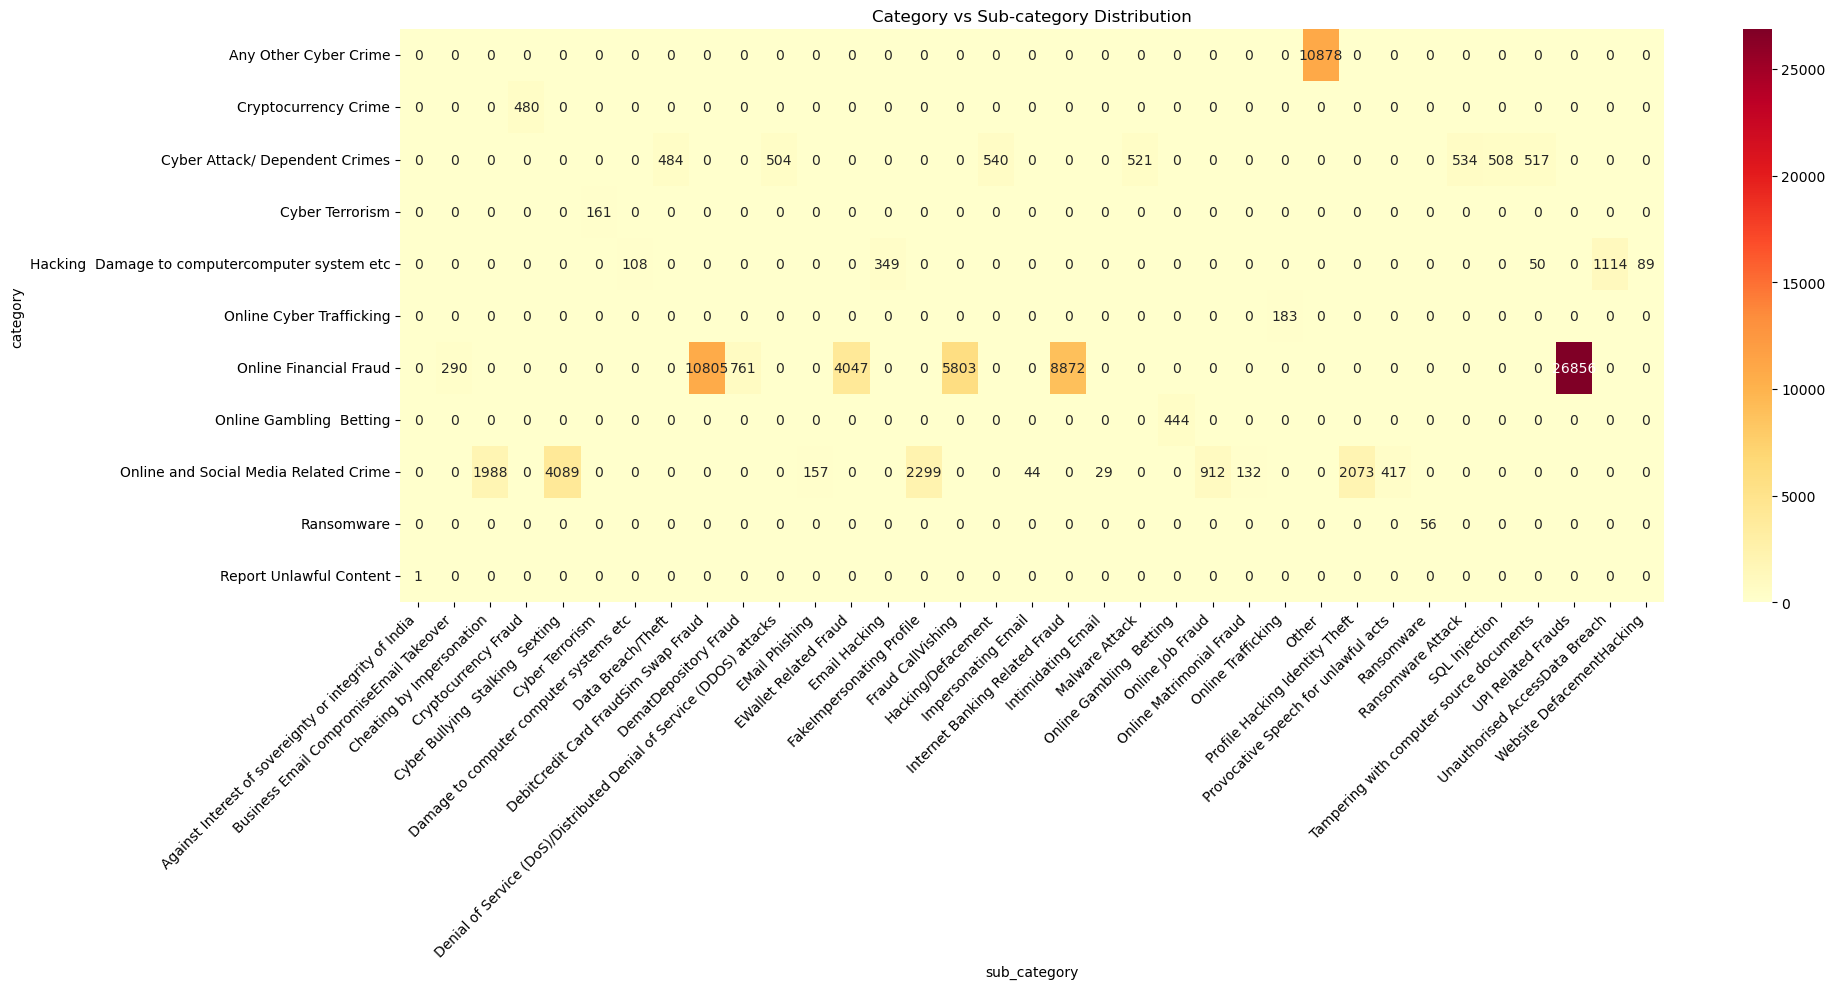

In [44]:
# Sub-category analysis
plt.figure(figsize=(15, 8))
train_subcategories = train_df['sub_category'].value_counts().head(15)
sns.barplot(x=train_subcategories.values, y=train_subcategories.index)
plt.title('Top 15 Sub-categories Distribution')
plt.xlabel('Number of Cases')
plt.tight_layout()
plt.show()

# Create a heatmap of category vs sub-category
plt.figure(figsize=(20, 10))
category_subcategory = pd.crosstab(train_df['category'], train_df['sub_category'])
sns.heatmap(category_subcategory, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Category vs Sub-category Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

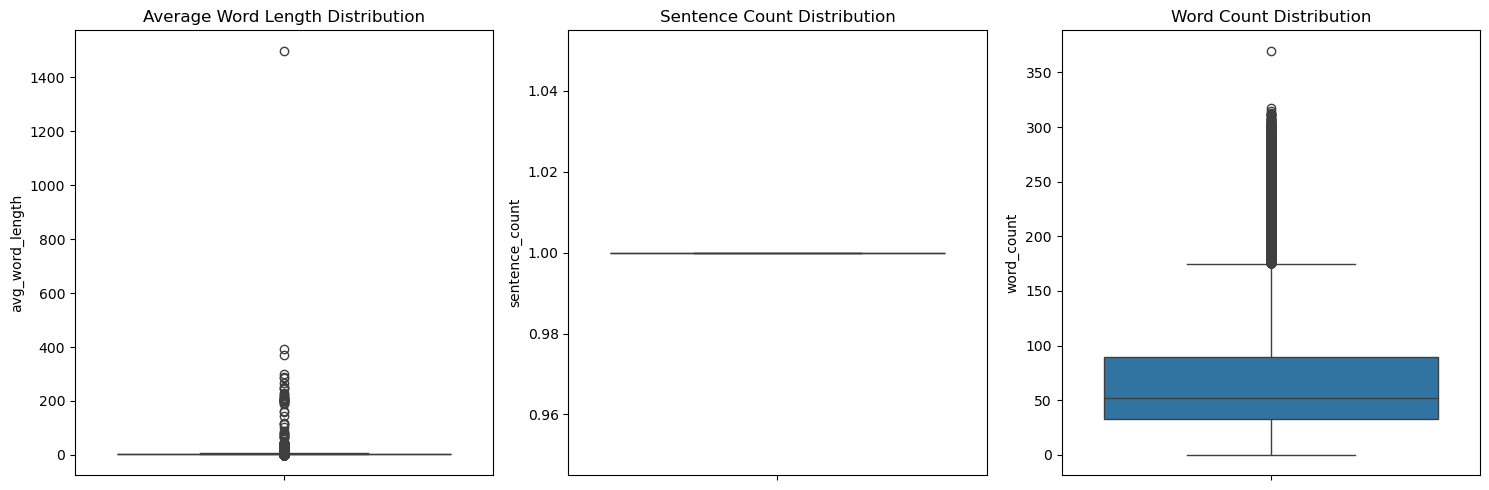

In [45]:
# Text complexity analysis
def analyze_text_complexity(text):
    if isinstance(text, str):
        sentences = text.split('.')
        words = text.split()
        return {
            'avg_word_length': np.mean([len(word) for word in words]) if words else 0,
            'sentence_count': len(sentences),
            'word_count': len(words)
        }
    return {'avg_word_length': 0, 'sentence_count': 0, 'word_count': 0}

# Apply complexity analysis
train_complexity = pd.DataFrame([analyze_text_complexity(text) for text in train_df['cleaned_text']])
test_complexity = pd.DataFrame([analyze_text_complexity(text) for text in test_df['cleaned_text']])

# Plot complexity metrics
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=train_complexity, y='avg_word_length')
plt.title('Average Word Length Distribution')
plt.subplot(1, 3, 2)
sns.boxplot(data=train_complexity, y='sentence_count')
plt.title('Sentence Count Distribution')
plt.subplot(1, 3, 3)
sns.boxplot(data=train_complexity, y='word_count')
plt.title('Word Count Distribution')
plt.tight_layout()
plt.show()

In [46]:
print("Training Dataset Shape:", train_df.shape)
print("Test Dataset Shape:", test_df.shape)

# Missing values comparison
missing_values = pd.DataFrame({
    'Train': train_df.isnull().sum(),
    'Test': test_df.isnull().sum()
})
print("\nMissing Values Comparison:")
print(missing_values)

Training Dataset Shape: (93686, 5)
Test Dataset Shape: (31229, 5)

Missing Values Comparison:
                    Train  Test
category                0     0
sub_category         6591  2236
crimeaditionalinfo     21     7
text_length             0     0
cleaned_text            0     0


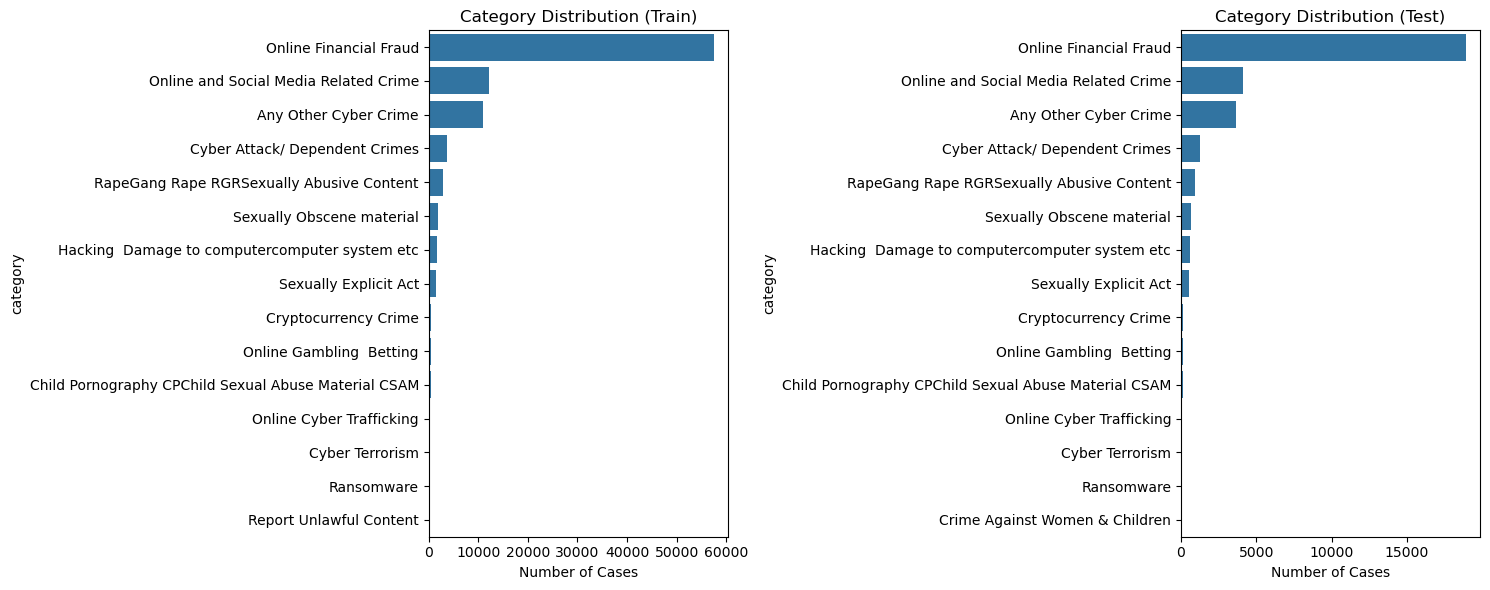

In [47]:
plt.figure(figsize=(15, 6))

# Plot side by side comparison
plt.subplot(1, 2, 1)
train_cats = train_df['category'].value_counts()
sns.barplot(x=train_cats.values, y=train_cats.index)
plt.title('Category Distribution (Train)')
plt.xlabel('Number of Cases')

plt.subplot(1, 2, 2)
test_cats = test_df['category'].value_counts()
sns.barplot(x=test_cats.values, y=test_cats.index)
plt.title('Category Distribution (Test)')
plt.xlabel('Number of Cases')

plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

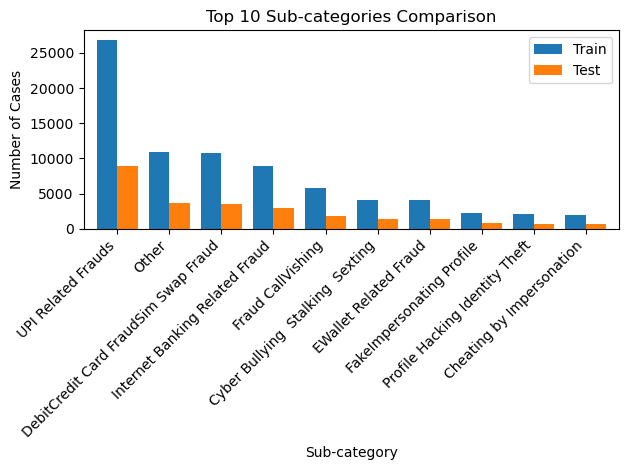

In [48]:
plt.figure(figsize=(15, 8))

# Compare top 10 sub-categories
train_subs = train_df['sub_category'].value_counts().head(10)
test_subs = test_df['sub_category'].value_counts().head(10)

# Create comparison DataFrame
comp_df = pd.DataFrame({
    'Train': train_subs,
    'Test': test_subs
})

comp_df.plot(kind='bar', width=0.8)
plt.title('Top 10 Sub-categories Comparison')
plt.xlabel('Sub-category')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()